In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
# Example of downloading a dataset from a URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
# Display the first few rows of the dataset
print(df.head())

# Get a summary of the dataset
print(df.info())

# Summary statistics
print(df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [50]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print(df[['SibSp', 'Parch', 'FamilySize']].head())

   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


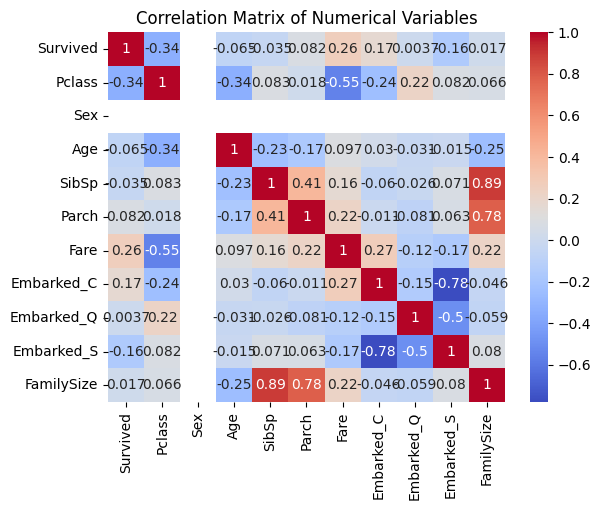

In [64]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


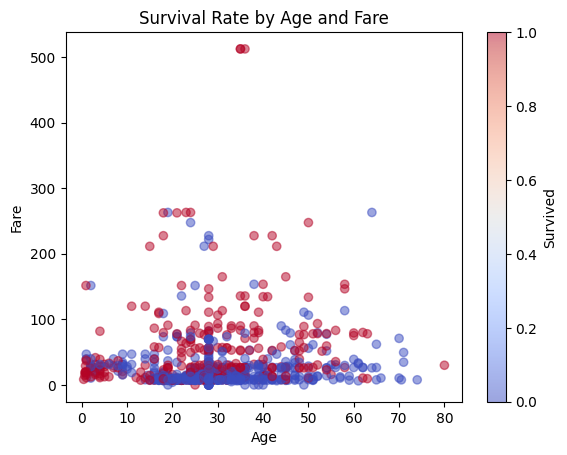

In [52]:
plt.scatter(df['Age'], df['Fare'], c=df['Survived'], cmap='coolwarm', alpha=0.5)
plt.title('Survival Rate by Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar(label='Survived')
plt.show()


In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Age', 'Fare']])
print(X_scaled[:5])


[[-0.56573646 -0.50244517]
 [ 0.66386103  0.78684529]
 [-0.25833709 -0.48885426]
 [ 0.4333115   0.42073024]
 [ 0.4333115  -0.48633742]]


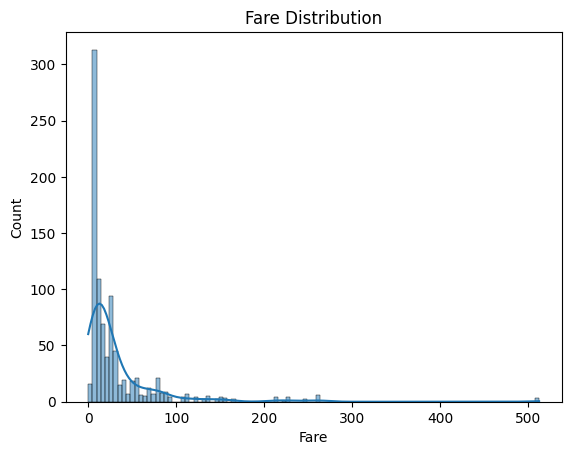

In [36]:
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


In [54]:
X = df.drop(columns='Survived')
y = df['Survived']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (712, 10)
Testing data shape: (179, 10)


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Load your dataset (example with Titanic dataset)
# df = pd.read_csv('titanic.csv')  # Replace with your data loading method

# Features and target variable
X = df.drop(columns='Survived')
y = df['Survived']

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Fill missing values with the mean
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased iterations to ensure convergence
model.fit(X_train, y_train)

# Print model coefficients and intercept
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")



Model coefficients: [[-0.73312817 -0.41253222 -0.23461759  0.23547296  0.16993918 -0.32484236
  -0.17382924 -0.59084289 -0.05324638]]
Model intercept: [-0.56372425]


C:\Users\adama\desktop\first\.venv\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Sex']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [60]:
y_pred = model.predict(X_test)

# Print evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7262569832402235
Confusion Matrix:
[[93 12]
 [37 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.89      0.79       105
           1       0.76      0.50      0.60        74

    accuracy                           0.73       179
   macro avg       0.74      0.69      0.70       179
weighted avg       0.73      0.73      0.71       179



In [61]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # Regularization parameter
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Best Parameters: {'C': 1}
Best Score: 0.7106470993794938
